# Формализованные модели и методы решения аналитических задач
## Бескоалиционная биматричная игр. Равновесие по Нэшу

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Вариант 13
Исходные данные


In [2]:
A = np.array([[9, 3],[1, 4]])
B = np.array([[5, 15],[20, 5]])
A

array([[9, 3],
       [1, 4]])

In [3]:
B

array([[ 5, 15],
       [20,  5]])

In [4]:
C = A[0,0]-A[1,0]-A[0,1]+A[1,1]
Alpha = A[1,1]-A[0,1]
D = B[0,0]-B[1,0]-B[0,1]+B[1,1]
Beta = B[1,1]-B[1,0]
print(f"C = {C} \nAlpha = {Alpha} \nD = {D} \nBeta = {Beta}")

C = 9 
Alpha = 1 
D = -25 
Beta = -15


In [5]:
def function_Nash(A, B):
    C = A[0,0]-A[1,0]-A[0,1]+A[1,1]
    Alpha = A[1,1]-A[0,1]
    D = B[0,0]-B[1,0]-B[0,1]+B[1,1]
    Beta = B[1,1]-B[1,0]
    print(f"C = {C} \nAlpha = {Alpha} \nD = {D} \nBeta = {Beta}")
    q = round(Alpha / C, 4)
    p = round(Beta / D, 4)
    print(f"\np* = [{p}, {1-p}] \nq* = [{q}, {1-q}]")
    
    p_strategy = np.array([[p, 1-p]])
    q_starategy = np.array([[q, 1-q]])

    f1 = np.dot(np.dot(p_strategy, A), q_starategy.T)
    f2 = np.dot(np.dot(p_strategy, B), q_starategy.T)

    print(f"\nBыигрыш I игрока: {round(f1[0][0], 2)}")
    print(f"Выигрыш II игрока: {round(f2[0][0], 2)}")
    return p, q, f1, f2

In [6]:
p, q, f1, f2 = function_Nash(A, B)

C = 9 
Alpha = 1 
D = -25 
Beta = -15

p* = [0.6, 0.4] 
q* = [0.1111, 0.8889]

Bыигрыш I игрока: 3.67
Выигрыш II игрока: 11.0


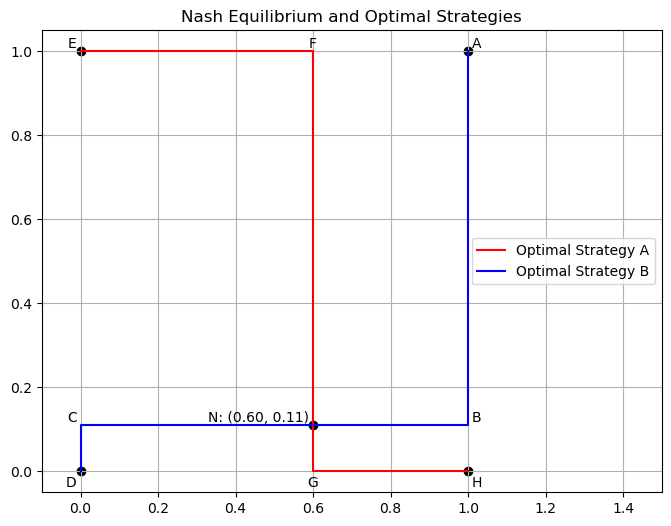

0

In [7]:
def visualisation_Nach(p, q):
    # Оптимальные стратегии для игрока A и игрока B
    optimal_strategies_A = [(0, 1), (p, 1), (p, 0), (1, 0)]
    optimal_strategies_B = [(1, 1), (1, q), (0, q), (0, 0)]

    # Равновесие по Нэшу
    equilibrium = [(p, q)]

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.xlim(-0.1, 1.5)

    # Отображение оптимальных стратегий для игрока A и игрока B
    plt.step([point[0] for point in optimal_strategies_A], [point[1] for point in optimal_strategies_A], 'r', where='post', label='Optimal Strategy A')
    plt.step([point[0] for point in optimal_strategies_B], [point[1] for point in optimal_strategies_B], 'b', where='post', label='Optimal Strategy B')

    # Отображение точек и их меток
    plt.scatter([0, 1, 1, 0, p], [1, 1, 0, 0, q], color='black')  # точки A, B, C, D, N
    plt.text(1.01, 1, 'A', ha='left', va='bottom')
    plt.text(1.01, 1/9, 'B', ha='left', va='bottom')
    plt.text(-0.01, 1/9, 'C', ha='right', va='bottom')
    plt.text(-0.01, -0.01, 'D', ha='right', va='top')

    # Добавление подписей и легенды
    plt.text(-0.01, 1, 'E', ha='right', va='bottom')
    plt.text(3/5, 1, 'F', ha='center', va='bottom')
    plt.text(3/5, -0.01, 'G', ha='center', va='top')
    plt.text(1.01, -0.01, 'H', ha='left', va='top')

    # Отображение графика
    plt.title('Nash Equilibrium and Optimal Strategies')
    plt.legend(loc='right')

    # Вывод координат точки равновесия по Нэшу в легенде
    plt.text(equilibrium[0][0] -0.01, equilibrium[0][1], f'N: ({equilibrium[0][0]:.2f}, {equilibrium[0][1]:.2f})', ha='right', va='bottom')

    plt.grid(True)
    plt.show()
    return 0
    
visualisation_Nach(p, q)

In [8]:
def visualisation_Pareto(A, B, f1, f2):
    # Множество Парето-оптимальных решений
    points = [(A[0][0], B[0][0]), 
              (A[0][1], B[0][1]), 
              (A[1][1], B[1][1]), 
              (A[1][0], B[1][0])]
    point_N = (f1, f2)
    plt.figure(figsize=(8, 6))

    # Отображение точек
    plt.plot([point[0] for point in points], [point[1] for point in points], 'ko', label='Pareto Optimal')
    plt.plot(point_N[0], point_N[1], 'go', label='Nash')
    plt.annotate('N', point_N, textcoords="offset points", xytext=(5, 5), ha='center')

    # Добавление меток для точек
    for label, (x, y) in zip(['A', 'B', 'C', 'D'], points):
        plt.annotate(
            label,
            (x, y),
            textcoords="offset points",
            xytext=(5, 5),
            ha='center')

    # Соединение точек отрезками
    plt.plot([points[0][0], points[2][0]], [points[0][1], points[2][1]], 'k-')
    plt.plot([points[2][0], points[3][0]], [points[2][1], points[3][1]], 'k-')
    plt.plot([points[0][0], points[3][0]], [points[0][1], points[3][1]], 'k-')



    # Отображение графика
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return 0


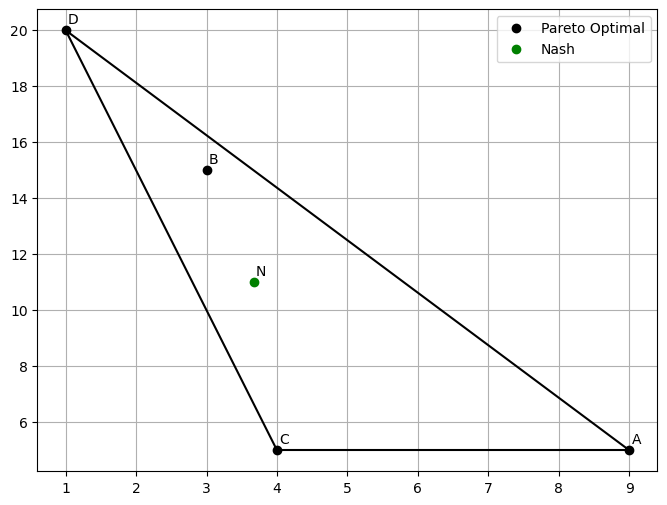

0

In [9]:
visualisation_Pareto(A, B, f1, f2)

## Имитационная модель

In [10]:
N = int(input('\nВведите количество раундов: '))


Введите количество раундов: 200


In [11]:
def game(matrix, N, p_variant=3/5, q_variant=1/9):
    # Генерация массива p
    random_p = np.random.choice([0, 1], size=N, p=[p_variant, 1 - p_variant])
    random_q = np.random.choice([0, 1], size=N, p=[q_variant, 1 - q_variant])
    
    # Создание набора для хранения элементов матрицы
    matrix_set = []
    for idx, (p, q) in enumerate(zip(random_p, random_q), 1):
        matrix_set.append((idx, matrix[p][q]))
    
    # Сортировка набора по номеру элемента
    matrix_set.sort()
    
    # Визуализация набора на графике с использованием лестничной диаграммы
    x_values = [pair[0] for pair in matrix_set]
    y_values = [pair[1] for pair in matrix_set]
    
    edges = list(range(len(matrix_set) + 1))
    
    plt.figure(figsize=(18, 6))
    
    plt.xlim(-1, N + 1)
    plt.ylim(min(matrix[0][0], matrix[1][0], matrix[0][1], matrix[1][1]) - 1, max(matrix[0][0], matrix[1][0], matrix[0][1], matrix[1][1]) + 1)
    plt.stairs(y_values, edges)
    
    # Построение прямой y = sum([pair[1] for pair in matrix_set]) / N
    plt.plot([min(x_values), max(x_values)], [sum(y_values) / N, sum(y_values) / N], color='red', linestyle='dashed', linewidth=2, label='Average')
    
    plt.xlabel('N')
    plt.ylabel('f')
#     plt.title('Matrix Elements')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return sum([pair[1] for pair in matrix_set]) / N


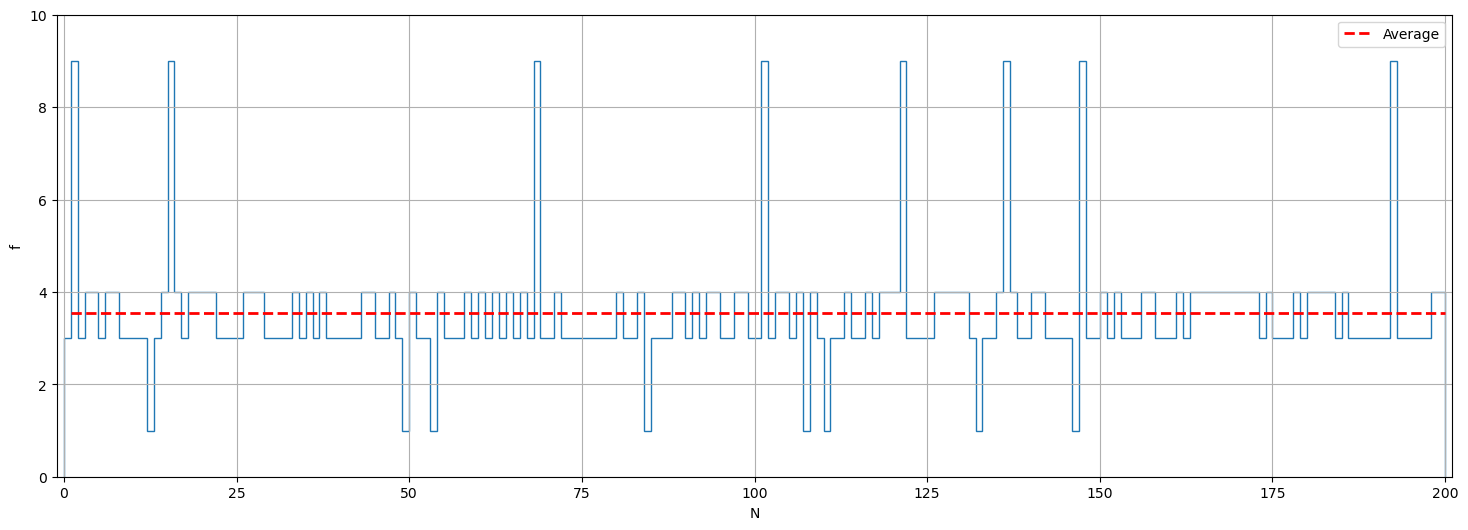

Выигрыш первого игрока: 3.55


In [12]:
f1_new = game(A, N)
print(f"Выигрыш первого игрока: {f1_new}")

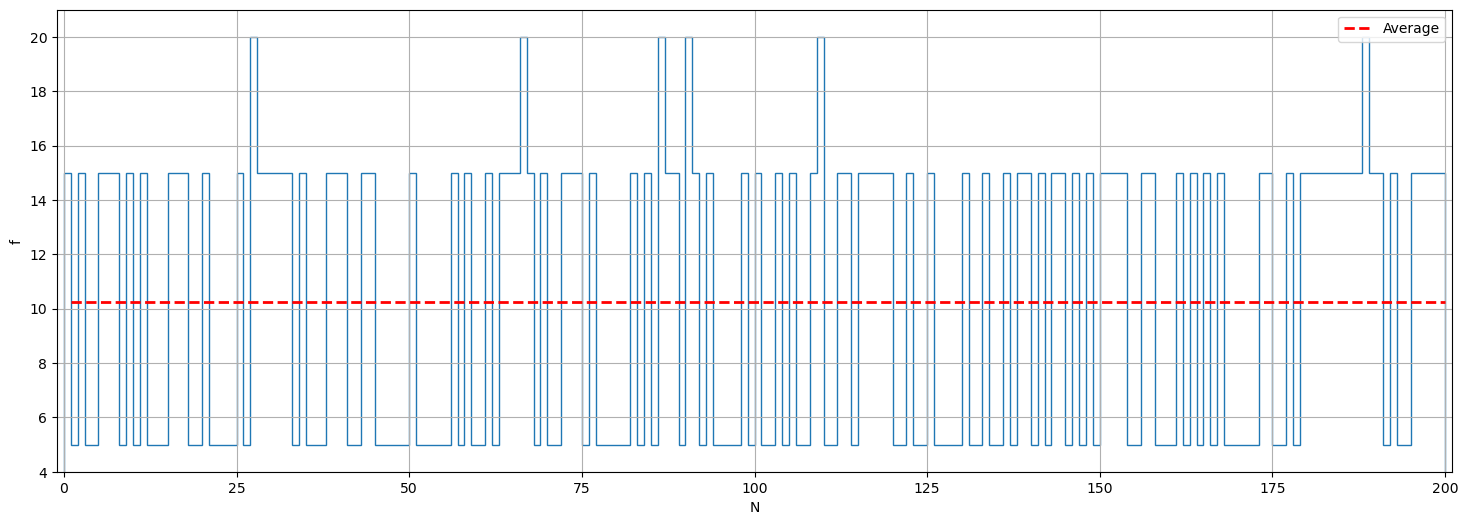

Выигрыш второго игрока: 10.25


In [13]:
f2_new = game(B, N)
print(f"Выигрыш второго игрока: {f2_new}")

Результаты, полученные аналитическим методом были подтверждены имитационной моделью.

При оптимальных стратегиях выигрыш первого игрока ~3.67, а второго ~ 11.

In [14]:
# Количество игр 
n = 10
n = int(input('Введите количество игр: '))
p_variants = np.random.rand(n)
# p_variants = np.sort(p_variants)
print(f"Для {n} игр значения будут выбираться из списка: \n{p_variants}")

Введите количество игр: 10
Для 10 игр значения будут выбираться из списка: 
[0.55780788 0.24943603 0.80109188 0.84192788 0.11612605 0.57686114
 0.19739161 0.2085785  0.66093618 0.95003941]


In [15]:
def short_game(matrix, N, p_variant=3/5, q_variant=1/9):
    # Генерация массива p
    random_p = np.random.choice([0, 1], size=N, p=[p_variant, 1 - p_variant])
    random_q = np.random.choice([0, 1], size=N, p=[q_variant, 1 - q_variant])
    
    # Вывод первых 10 элементов массива 
#     print(random_p[:10], random_q[:10])
    # Создание набора для хранения элементов матрицы
    matrix_set = []
    for idx, (p, q) in enumerate(zip(random_p, random_q), 1):
        matrix_set.append((idx, matrix[p][q]))
    
    # Сортировка набора по номеру элемента
    matrix_set.sort()
    
    return sum([pair[1] for pair in matrix_set]) / N


In [16]:
for p_variant in p_variants:
    result = short_game(A, N, p_variant=p_variant)
    while result >= f1:
        result = short_game(A, N, p_variant=p_variant)
    else:
        print(f"p = : {round(p_variant, 5)}, Среднее значение игры: {result}")

p = : 0.55781, Среднее значение игры: 3.445
p = : 0.24944, Среднее значение игры: 3.555
p = : 0.80109, Среднее значение игры: 3.55
p = : 0.84193, Среднее значение игры: 3.65
p = : 0.11613, Среднее значение игры: 3.63
p = : 0.57686, Среднее значение игры: 3.39
p = : 0.19739, Среднее значение игры: 3.65
p = : 0.20858, Среднее значение игры: 3.605
p = : 0.66094, Среднее значение игры: 3.555
p = : 0.95004, Среднее значение игры: 3.51


In [17]:
q_variants = np.random.rand(n)
# q_variants = np.sort(q_variants)
print(f"Для {n} игр значения будут выбираться из списка: \n{q_variants}")

Для 10 игр значения будут выбираться из списка: 
[0.29398302 0.97836203 0.88807322 0.64814936 0.84775222 0.00527526
 0.41825597 0.95965638 0.46772777 0.94520974]


In [18]:
for q_variant in q_variants:
    result = short_game(B, N, q_variant=q_variant)
    while result >= f2:
        result = short_game(B, N, q_variant=q_variant)
    else:
        print(f"q = : {round(q_variant, 5)}, Среднее значение игры: {result}")

q = : 0.29398, Среднее значение игры: 10.95
q = : 0.97836, Среднее значение игры: 10.9
q = : 0.88807, Среднее значение игры: 10.825
q = : 0.64815, Среднее значение игры: 10.925
q = : 0.84775, Среднее значение игры: 10.925
q = : 0.00528, Среднее значение игры: 10.45
q = : 0.41826, Среднее значение игры: 10.7
q = : 0.95966, Среднее значение игры: 9.825
q = : 0.46773, Среднее значение игры: 10.7
q = : 0.94521, Среднее значение игры: 10.825
